# UV_LED_GRID_FOR_PHOTOLITHOGRAPGHY

In [245]:
from multiprocessing import Pool
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Functions 

In [278]:
def arrangement_1(nleds,d):
    l=math.sqrt(nleds);
    ledcord=np.zeros((2,nleds));
    temp=0;
    for k in range(nleds):
        ledcord[0,k]=-(l-1)*d/2 +((k)%l)*d;
        if (k)%l ==0 and k != 0:
            temp=temp+1;
        ledcord[1,k]=-(l-1)*d/2 + temp*d;
    return ledcord

def arrangement_2(nleds,d):
    l = (math.sqrt(nleds)-1)/2
    ledcord=np.zeros((2,nleds));
    ledcord[0,0]=0
    ledcord[1,0]=0
    for k in range(1,9):
        ledcord[0,k]=d*np.cos(k*np.pi/4)
        ledcord[1,k]=d*np.sin(k*np.pi/4)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(9,25):
        ledcord[0,k]=2*d*np.cos(k*np.pi/8)
        ledcord[1,k]=2*d*np.sin(k*np.pi/8)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(25,49):
        ledcord[0,k]=3*d*np.cos(k*np.pi/12)
        ledcord[1,k]=3*d*np.sin(k*np.pi/12)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(49,81):
        ledcord[0,k]=4*d*np.cos(k*np.pi/16)
        ledcord[1,k]=4*d*np.sin(k*np.pi/16)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(81,121):
        ledcord[0,k]=5*d*np.cos(k*np.pi/20)
        ledcord[1,k]=5*d*np.sin(k*np.pi/20)
    l=l-1
    if(l<=0):
        return ledcord 
        
def arrangement_3(nleds,d):
    l = (math.sqrt(nleds)-1)/2
    ledcord=np.zeros((2,nleds));
    ledcord[0,0]=0
    ledcord[1,0]=0
    for k in range(1,9):
        ledcord[0,k]=np.sqrt(2)*d*np.cos(k*np.pi/4)
        ledcord[1,k]=np.sqrt(2)*d*np.sin(k*np.pi/4)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(9,25):
        ledcord[0,k]=np.sqrt(2)*2*d*np.cos(k*np.pi/8)
        ledcord[1,k]=np.sqrt(2)*2*d*np.sin(k*np.pi/8)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(25,49):
        ledcord[0,k]=np.sqrt(2)*3*d*np.cos(k*np.pi/12)
        ledcord[1,k]=np.sqrt(2)*3*d*np.sin(k*np.pi/12)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(49,81):
        ledcord[0,k]=np.sqrt(2)*4*d*np.cos(k*np.pi/16)
        ledcord[1,k]=np.sqrt(2)*4*d*np.sin(k*np.pi/16)
    l=l-1
    if(l<=0):
        return ledcord 
    for k in range(81,121):
        ledcord[0,k]=np.sqrt(2)*5*d*np.cos(k*np.pi/20)
        ledcord[1,k]=np.sqrt(2)*5*d*np.sin(k*np.pi/20)
    l=l-1
    if(l<=0):
        return ledcord    

def E_r(ledcord,nleds,Ir_0,z,d,r,th):    
    x=r*np.cos(th);
    x=r;
    y=0
     y=r*np.sin(th);
    E=0;
    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den))
    return E

# Arrangement 1 : SQUARE GRID

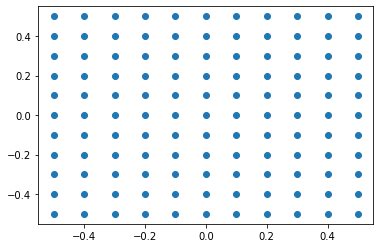

In [247]:
nleds =121
d=0.1
ledcord = arrangement_1(nleds,d)
plt.scatter(ledcord[0,:], ledcord[1,:])

In [248]:
Ir_0 = 0.1
final_list_1 = []

def ratio(d):
    final_list_1 = []
    Ir_0=0.1
    for nleds in [9,25,49,81,121]:
        lled=np.sqrt(nleds)   
        ledcord = arrangement_1(nleds,d)
        nz = round((0.5 - d)/0.001) + 1
        for z in np.linspace(d,0.5,nz):
            min_E=1000000;
            max_E=0;
            ni = round((0.04)/0.001) + 1
            for i in np.linspace(0,0.04,ni):
                E_i = E_r(ledcord,nleds,Ir_0,z,d,i,0)
                min_E = min(min_E,E_i)
                max_E = max(max_E,E_i)
            percent_uniformity=(min_E/max_E)*100

            t = 4000/(max_E + min_E)
            energy_max = max_E * t
            energy_min = min_E * t

            final_list_1.append([nleds,d,z,min_E,max_E,t,energy_min/10,energy_max/10,percent_uniformity])
    return final_list_1

with Pool(7) as p:
    l = list(tqdm(p.imap(ratio,np.linspace(0.01,0.2,191)), total=191))

100%|██████████| 191/191 [48:12<00:00, 15.15s/it] 


In [249]:
t_1=[]
for i in l:
    t_1.extend(i)
final_list_1=t_1

In [250]:
#df_1=pd.read_pickle("./df_1.pkl")
df_1 = pd.DataFrame(final_list_1,columns=["nleds","d(m)","z(m)","min_E(W/m^2)","max_E(W/m^2)","exposure_time(s)","energy_min(mJ/cm^2)","energy_max(mJ^cm^2)","percent_uniformity"])
df_1.to_pickle("./df_1.pkl")

## Arrangement 2 : INNER CIRCLE

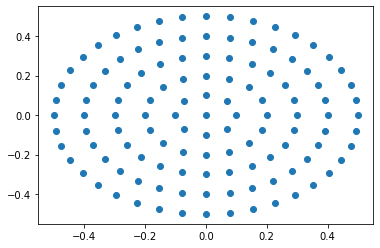

In [253]:
nleds =121
d=0.1
ledcord = arrangement_2(nleds,d)
plt.scatter(ledcord[0,:], ledcord[1,:])

In [254]:
Ir_0 = 0.1
final_list_2 = []

def ratio(d):
    final_list_2 = []
    Ir_0=0.1
    for nleds in [9,25,49,81,121]:
        lled=np.sqrt(nleds)   
        ledcord = arrangement_2(nleds,d)
        nz = round((0.5 - d)/0.001) + 1
        for z in np.linspace(d,0.5,nz):
            min_E=1000000;
            max_E=0;
            ni = round((0.04)/0.001) + 1
            for i in np.linspace(0,0.04,ni):
                E_i = E_r(ledcord,nleds,Ir_0,z,d,i,0)
                min_E = min(min_E,E_i)
                max_E = max(max_E,E_i)
            percent_uniformity=(min_E/max_E)*100

            t = 4000/(max_E + min_E)
            energy_max = max_E * t
            energy_min = min_E * t

            final_list_2.append([nleds,d,z,min_E,max_E,t,energy_min/10,energy_max/10,percent_uniformity])
    return final_list_2

with Pool(7) as p:
    l = list(tqdm(p.imap(ratio,np.linspace(0.01,0.2,191)), total=191))

100%|██████████| 191/191 [51:28<00:00, 16.17s/it] 


In [255]:
t_2=[]
for i in l:
    t_2.extend(i)

final_list_2 = t_2

In [256]:
#df_2=pd.read_pickle("./df_2.pkl")
df_2 = pd.DataFrame(final_list_2,columns=["nleds","d(m)","z(m)","min_E(W/m^2)","max_E(W/m^2)","exposure_time(s)","energy_min(mJ/cm^2)","energy_max(mJ^cm^2)","percent_uniformity"])
df_2.to_pickle("./df_2.pkl")

# Arrangement_3 : OUTER CIRCLE

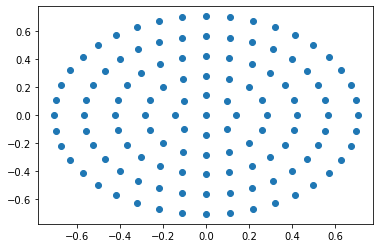

In [259]:
nleds =121
d=0.1
ledcord = arrangement_3(nleds,d)
plt.scatter(ledcord[0,:], ledcord[1,:])

In [260]:
Ir_0 = 0.1
final_list_3 = []

def ratio(d):
    final_list_3 = []
    Ir_0=0.1
    for nleds in [9,25,49,81,121]:
        lled=np.sqrt(nleds)   
        ledcord = arrangement_3(nleds,d)
        nz = round((0.5 - d)/0.001) + 1
        for z in np.linspace(d,0.5,nz):
            min_E=1000000;
            max_E=0;
            ni = round((0.04)/0.001) + 1
            for i in np.linspace(0,0.04,ni):
                E_i = E_r(ledcord,nleds,Ir_0,z,d,i,0)
                min_E = min(min_E,E_i)
                max_E = max(max_E,E_i)
            percent_uniformity=(min_E/max_E)*100

            t = 4000/(max_E + min_E)
            energy_max = max_E * t
            energy_min = min_E * t

            final_list_3.append([nleds,d,z,min_E,max_E,t,energy_min/10,energy_max/10,percent_uniformity])
    return final_list_3

with Pool(7) as p:
    l = list(tqdm(p.imap(ratio,np.linspace(0.01,0.2,191)), total=191))

100%|██████████| 191/191 [48:35<00:00, 15.26s/it] 


In [270]:
t_3=[]
for i in l:
    t_3.extend(i)

final_list_3=t_3

In [329]:
#df_3=pd.read_pickle("./df_3.pkl")
df_3 = pd.DataFrame(final_list_3,columns=["nleds","d(m)","z(m)","min_E(W/m^2)","max_E(W/m^2)","exposure_time(s)","energy_min(mJ/cm^2)","energy_max(mJ^cm^2)","percent_uniformity"])
df_3.to_pickle("./df_3.pkl")

# No restrictions on LED grid size

### Maximum_percent_uniformity 

In [251]:
idx = df_1.groupby(['nleds'])['percent_uniformity'].transform(max) == df_1['percent_uniformity']
df_1[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
376975,9,0.2,0.500,2.492124,2.507334,800.086610,199.391541,200.608459,99.393387
377116,25,0.2,0.340,5.751994,5.764446,347.329552,199.783750,200.216250,99.783984
377437,49,0.2,0.360,6.480728,6.486233,308.476272,199.915095,200.084905,99.915131
377758,81,0.2,0.380,6.866439,6.869194,291.213385,199.959881,200.040119,99.959889
378078,121,0.2,0.399,7.097583,7.099109,281.755781,199.978503,200.021497,99.978505


In [257]:
idx = df_2.groupby(['nleds'])['percent_uniformity'].transform(max) == df_2['percent_uniformity']
df_2[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
376975,9,0.2,0.500,2.757686,2.778121,722.568441,199.261723,200.738277,99.264439
377044,25,0.2,0.268,8.105290,8.125655,246.442819,199.749064,200.250936,99.749379
377358,49,0.2,0.281,8.916441,8.926102,224.183290,199.891701,200.108299,99.891759
377670,81,0.2,0.292,9.332817,9.338689,214.230183,199.937101,200.062899,99.937120
377980,121,0.2,0.301,9.575905,9.580210,208.810599,199.955054,200.044946,99.955064


In [272]:
idx = df_3.groupby(['nleds'])['percent_uniformity'].transform(max) == df_3['percent_uniformity']
df_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
376852,9,0.2,0.377,2.994893,3.008009,666.344326,199.563028,200.436972,99.563981
377159,25,0.2,0.383,4.037844,4.042961,495.000158,199.873363,200.126637,99.873443
377479,49,0.2,0.402,4.444963,4.447398,449.824261,199.945235,200.054765,99.945250
377795,81,0.2,0.417,4.657853,4.659333,429.314171,199.968218,200.031782,99.968223
378110,121,0.2,0.431,4.778895,4.779978,418.459405,199.977341,200.022659,99.977344


### Minimum_exposure_time 

In [252]:
ef_1=df_1[df_1['percent_uniformity']>99]
idx = ef_1.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_1['exposure_time(s)']
ef_1[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
339128,9,0.176,0.249,6.034938,6.095878,329.738733,198.995277,201.004723,99.000299
185160,25,0.092,0.138,28.695536,28.985091,69.347373,198.996007,201.003993,99.001022
90694,49,0.048,0.061,122.840000,124.072012,16.200103,199.002065,200.997935,99.007019
56612,81,0.033,0.041,270.900817,273.583297,7.346404,199.014671,200.985329,99.019502
38214,121,0.025,0.035,474.073674,478.809737,4.197785,199.005951,200.994049,99.010867


In [267]:
ef_2=df_2[df_2['percent_uniformity']>99]
idx = ef_2.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_2['exposure_time(s)']
ef_2[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
361383,9,0.190,0.223,7.337314,7.411370,271.210635,198.995772,201.004228,99.000789
195303,25,0.097,0.116,35.907281,36.269619,55.419393,198.995972,201.004028,99.000987
86142,49,0.046,0.048,180.004848,181.676114,11.059471,199.075834,200.924166,99.080085
72859,81,0.040,0.041,246.105731,248.427626,8.088433,199.060975,200.939025,99.065363
71013,121,0.039,0.039,263.644068,266.287969,7.548138,199.002174,200.997826,99.007127


In [273]:
ef_3=df_3[df_3['percent_uniformity']>99]
idx = ef_3.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_3['exposure_time(s)']
ef_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
266380,9,0.134,0.224,7.335261,7.409261,271.287193,198.996246,201.003754,99.001259
136769,25,0.069,0.116,35.566516,35.923585,55.951803,199.001068,200.998932,99.006032
53808,49,0.032,0.047,186.115658,187.900735,10.694718,199.045455,200.954545,99.049989
44856,81,0.028,0.040,251.647068,254.092827,7.909204,199.032800,200.967200,99.037454
45329,121,0.028,0.040,255.595756,257.937502,7.789174,199.087987,200.912013,99.092127


# Restrictions on LED grid size

In [315]:
grid_size=0.3
df_1_3 = df_1[(np.sqrt(df_1["nleds"])-1) * df_1["d(m)"] <= grid_size]
df_2_3 = df_2[(np.sqrt(df_1["nleds"])-1) * df_2["d(m)"] <= grid_size]
df_3_3 = df_3[(np.sqrt(df_1["nleds"])-1) * df_3["d(m)"] <= grid_size]

### Maximum_percent_uniformity 

In [316]:
idx = df_1_3.groupby(['nleds'])['percent_uniformity'].transform(max) == df_1_3['percent_uniformity']
df_1_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
293641,9,0.149,0.500,2.879550,2.903416,691.686591,199.174597,200.825403,99.177990
150026,25,0.075,0.500,8.399254,8.476842,237.021645,199.080491,200.919509,99.084699
93395,49,0.049,0.500,16.835624,16.998545,118.223682,199.036947,200.963053,99.041562
65933,81,0.037,0.048,214.731593,216.100719,9.284355,199.364427,200.635573,99.366441
50049,121,0.030,0.045,327.476602,329.699808,6.086646,199.323407,200.676593,99.325688


In [317]:
idx = df_2_3.groupby(['nleds'])['percent_uniformity'].transform(max) == df_2_3['percent_uniformity']
df_2_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
293641,9,0.149,0.500,3.070372,3.099296,648.333036,199.062381,200.937619,99.066756
150026,25,0.075,0.500,8.759548,8.847470,227.182136,199.001284,200.998716,99.006246
92947,49,0.049,0.052,158.187333,159.525443,12.589988,199.157661,200.842339,99.161194
66385,81,0.037,0.500,28.931549,29.233974,68.769260,198.960121,201.039879,98.965500
50504,121,0.030,0.500,43.260993,43.714164,45.990144,198.957930,201.042070,98.963331


In [318]:
idx = df_3_3.groupby(['nleds'])['percent_uniformity'].transform(max) == df_3_3['percent_uniformity']
df_3_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
293641,9,0.149,0.500,2.688736,2.707536,741.252433,199.303236,200.696764,99.305655
150026,25,0.075,0.500,7.863574,7.926716,253.320238,199.200236,200.799764,99.203422
92976,49,0.049,0.081,77.524956,78.056103,25.710070,199.317208,200.682792,99.319532
65944,81,0.037,0.059,142.370936,143.011954,14.016257,199.550766,200.449234,99.551773
50050,121,0.030,0.046,221.428871,222.691632,9.006565,199.431343,200.568657,99.432955


### Minimum_exposure_time 

In [319]:
ef_1_3=df_1_3[df_1_3['percent_uniformity']>99]
idx = ef_1_3.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_1_3['exposure_time(s)']
ef_1_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
293556,9,0.149,0.415,3.832370,3.871068,519.248622,198.995302,201.004698,99.000324
149995,25,0.075,0.469,9.344227,9.438445,212.962242,198.996753,201.003247,99.001761
90694,49,0.048,0.061,122.840000,124.072012,16.200103,199.002065,200.997935,99.007019
56612,81,0.033,0.041,270.900817,273.583297,7.346404,199.014671,200.985329,99.019502
38214,121,0.025,0.035,474.073674,478.809737,4.197785,199.005951,200.994049,99.010867


In [320]:
ef_2_3=df_2_3[df_2_3['percent_uniformity']>99]
idx = ef_2_3.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_2_3['exposure_time(s)']
ef_2_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
293617,9,0.149,0.476,3.336489,3.370111,596.427429,198.997355,201.002645,99.002356
150024,25,0.075,0.498,8.821286,8.910375,225.585193,198.995144,201.004856,99.000168
86142,49,0.046,0.048,180.004848,181.676114,11.059471,199.075834,200.924166,99.080085


In [321]:
ef_3_3=df_3_3[df_3_3['percent_uniformity']>99]
idx = ef_3_3.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_3_3['exposure_time(s)']
ef_3_3[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
266380,9,0.134,0.224,7.335261,7.409261,271.287193,198.996246,201.003754,99.001259
136769,25,0.069,0.116,35.566516,35.923585,55.951803,199.001068,200.998932,99.006032
53808,49,0.032,0.047,186.115658,187.900735,10.694718,199.045455,200.954545,99.049989
44856,81,0.028,0.040,251.647068,254.092827,7.909204,199.032800,200.967200,99.037454
45329,121,0.028,0.040,255.595756,257.937502,7.789174,199.087987,200.912013,99.092127


## Constant z with restricted LED Grid size 

In [322]:
z_cons = 0.35
df_1_3_z= df_1_3[(df_1_3["z(m)"]==z_cons) | (np.isclose(df_1_3["z(m)"],z_cons ))]
df_2_3_z= df_2_3[(df_2_3["z(m)"]==z_cons) | (np.isclose(df_2_3["z(m)"],z_cons ))]
df_3_3_z= df_3_3[(df_3_3["z(m)"]==z_cons) | (np.isclose(df_3_3["z(m)"],z_cons ))]

 ### Maximum_percent_uniformity

In [323]:
idx_z = df_1_3_z.groupby(['nleds'])['percent_uniformity'].transform(max) == df_1_3_z['percent_uniformity']
df_1_3_z[idx_z].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
293491,9,0.149,0.35,4.859665,4.915556,409.197916,198.856483,201.143517,98.862984
149876,25,0.075,0.35,14.728768,14.936855,134.836200,198.597117,201.402883,98.606888
93245,49,0.049,0.35,30.040578,30.502605,66.068544,198.473728,201.526272,98.485288
66235,81,0.037,0.35,50.249345,51.041904,39.490084,198.435089,201.564911,98.447239
50354,121,0.030,0.35,75.306777,76.503038,26.348757,198.424001,201.575999,98.436323


In [324]:
idx = df_2_3_z.groupby(['nleds'])['percent_uniformity'].transform(max) == df_2_3_z['percent_uniformity']
df_2_3_z[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
293491,9,0.149,0.35,5.419972,5.496727,366.411120,198.593812,201.406188,98.603630
149876,25,0.075,0.35,15.849869,16.108342,125.163453,198.382432,201.617568,98.395409
93245,49,0.049,0.35,31.933047,32.486222,62.093223,198.282581,201.717419,98.297203
66235,81,0.037,0.35,53.206254,54.144005,37.261205,198.252914,201.747086,98.268044
50354,121,0.030,0.35,79.627403,81.036719,24.896660,198.245637,201.754363,98.260892


In [325]:
idx = df_3_3_z.groupby(['nleds'])['percent_uniformity'].transform(max) == df_3_3_z['percent_uniformity']
df_3_3_z[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
293491,9,0.149,0.35,4.299451,4.334385,463.293529,199.190770,200.809230,99.194031
149876,25,0.075,0.35,13.135824,13.280500,151.421524,198.904646,201.095354,98.910613
93245,49,0.049,0.35,26.999181,27.329463,73.625986,198.784134,201.215866,98.791481
66235,81,0.037,0.35,45.251467,45.822042,43.920566,198.747000,201.253000,98.754801
50354,121,0.030,0.35,67.820403,68.682046,29.303504,198.737542,201.262458,98.745461


### Minimum_exposure_time

In [326]:
ef_1_3_z=df_1_3_z[df_1_3_z['percent_uniformity']>98]
idx = ef_1_3_z.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_1_3_z['exposure_time(s)']
ef_1_3_z[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
157936,9,0.079,0.35,6.333506,6.462052,312.608468,197.990775,202.009225,98.010759
85989,25,0.046,0.35,17.576219,17.933495,112.645232,197.987728,202.012272,98.007772
56453,49,0.033,0.35,34.341445,35.035604,57.655955,197.998880,202.001120,98.018704
40429,81,0.026,0.35,56.542376,57.676366,35.020522,198.014354,201.985646,98.033874
28979,121,0.021,0.35,84.691160,86.399356,23.379437,198.003168,201.996832,98.022908


In [327]:
ef_2_3_z=df_2_3_z[df_2_3_z['percent_uniformity']>98]
idx = ef_2_3_z.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_2_3_z['exposure_time(s)']
ef_2_3_z[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
191080,9,0.095,0.35,6.352324,6.481451,311.677585,197.987701,202.012299,98.007746
104033,25,0.054,0.35,17.579138,17.935689,112.629015,197.992100,202.007900,98.012058
68088,49,0.038,0.35,34.423347,35.120923,57.517320,197.993865,202.006135,98.013788
47527,81,0.029,0.35,57.053112,58.216047,34.701390,197.982226,202.017774,98.002380
36149,121,0.024,0.35,84.923997,86.642509,23.314574,197.996681,202.003319,98.016548


In [328]:
ef_3_3_z=df_3_3_z[df_3_3_z['percent_uniformity']>98]
idx = ef_3_3_z.groupby(['nleds'])['exposure_time(s)'].transform(min) == ef_3_3_z['exposure_time(s)']
ef_3_3_z[idx].sort_values("nleds")

,nleds,d(m),z(m),min_E(W/m^2),max_E(W/m^2),exposure_time(s),energy_min(mJ/cm^2),energy_max(mJ^cm^2),percent_uniformity
132238,9,0.067,0.35,6.356127,6.485502,311.486963,197.985069,202.014931,98.005166
67625,25,0.038,0.35,17.598878,17.956675,112.500008,197.987392,202.012608,98.007443
42326,49,0.027,0.35,34.384220,35.079347,57.584143,197.998585,202.001415,98.018415
28499,81,0.021,0.35,56.735173,57.878220,34.899935,198.005388,201.994612,98.025084
19349,121,0.017,0.35,84.889199,86.605540,23.324331,197.998374,202.001626,98.018208
